# **Multi Armed Bandits Problem (Çok Kollu Haydut Problemi)**

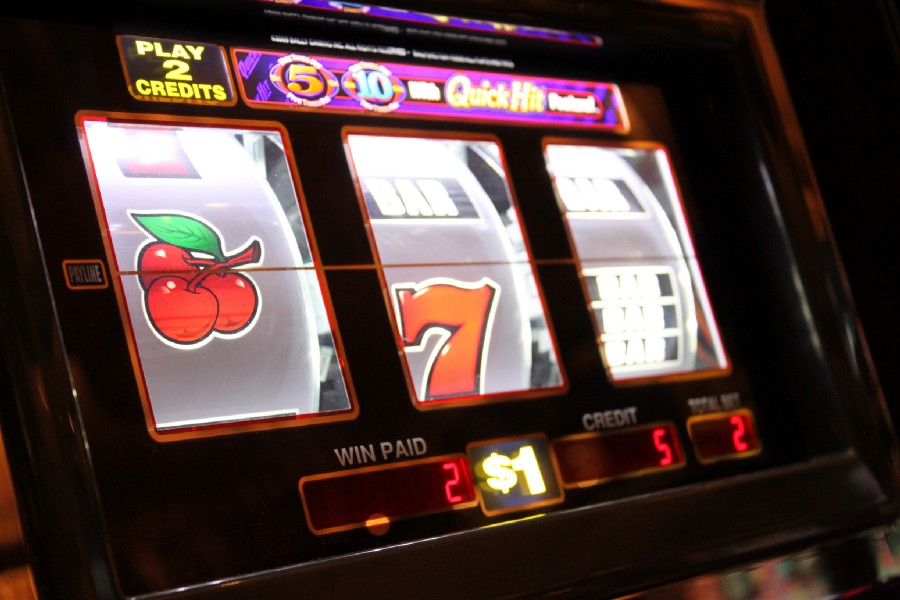

In [16]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

##Creating Environment

In [17]:
class Env(object):
  #ödül tahmini ve gerçek ödülü initial ederiz
  def __init__(self, reward_prob, rewards): 
    if len(reward_prob) != len(rewards):
      raise Exception(f"size of reward probs: {len(reward_prob)} does not match size of rewards : {len(rewards)}")

    self.reward_prob = reward_prob
    self.rewards = rewards
    self.k_arms = len(rewards)

  def choose_arm(self, arm):
    if arm < 0 or arm > self.k_arms:
      raise Exception(f"arm must be a value between 0 and {self.k_arms-1}")
    
    return self.rewards[arm] if np.random.random() < self.reward_prob[arm] else 0.0

In [18]:
# arm count --10--
environment = Env(reward_prob=[0.01, 1.0, 0.75, 0.99, 0.65, 1.0, 0.55, 0.15, 0.75, 0.45],
                  rewards=[95.0, 0.0, 25.5, 10.05, 5.45, 2.5, 30.05, 45.0, 75.5, 15.25])

print(f"Reward Prob\t\t: {environment.reward_prob}")
print(f"Rewards \t\t: {environment.rewards}")

Reward Prob		: [0.01, 1.0, 0.75, 0.99, 0.65, 1.0, 0.55, 0.15, 0.75, 0.45]
Rewards 		: [95.0, 0.0, 25.5, 10.05, 5.45, 2.5, 30.05, 45.0, 75.5, 15.25]


In [19]:
# sample trial 
for i in range(10):
  print(environment.choose_arm(3))

10.05
10.05
10.05
10.05
10.05
10.05
10.05
10.05
10.05
10.05


## Create Bandits

In [20]:
class RandomAgent(object):
  # Values into Richard Sutton & Andrew Barto's Book

  def __init__(self, env, max_iterations=2000):
    self.env = env
    self.iterations = max_iterations

  def act(self):
    arm_counts = np.zeros(self.env.k_arms)
    rewards = []
    total_rewards = []

    for i in range(1, self.iterations + 1):
      arm = np.random.choice(self.env.k_arms)
      reward = self.env.choose_arm(arm)

      arm_counts[arm] += 1
      rewards.append(reward)
      total_rewards.append(sum(rewards)/ len(rewards))

    return {"arms": arm_counts, "rewards": rewards, "total_rewards": total_rewards}

## Create Epsilon Greedy Agent

In [21]:
class EpsilonGreedyAgent(object):

  def __init__(self, env, max_iterations=2000, epsilon=0.01):
    self.env = env 
    self.iterations = max_iterations
    self.epsilon = epsilon 

  def act(self):
    q_values = np.zeros(self.env.k_arms)
    arm_rewards = np.zeros(self.env.k_arms)
    arm_counts = np.zeros(self.env.k_arms)

    rewards = []
    total_rewards = []

    for i in range(1, self.iterations + 1):
      arm = np.random.choice(self.env.k_arms) if np.random.random() < self.epsilon else np.argmax(q_values)
      reward = self.env.choose_arm(arm)

      arm_rewards[arm] += reward
      arm_counts[arm] += 1
      q_values[arm] = arm_rewards[arm]/arm_counts[arm]

      rewards.append(reward)
      total_rewards.append(sum(rewards)/ len(rewards))


    return {"arms": arm_counts, "rewards": rewards, "total_rewards": total_rewards}


### Create Epsilon Greedy Decay Agent

In [22]:
class EpsilonGreedyDecayAgent(object):

  def __init__(self, env, max_iterations=2000, epsilon=0.01, decay=0.001, decay_interval=50):
    self.env = env 
    self.iterations = max_iterations
    self.epsilon = epsilon 
    self.decay = decay 
    self.decay_interval = decay_interval

  def act(self):
    q_values = np.zeros(self.env.k_arms)
    arm_rewards = np.zeros(self.env.k_arms)
    arm_counts = np.zeros(self.env.k_arms)

    rewards = []
    total_rewards = []

    for i in range(1, self.iterations + 1):
      arm = np.random.choice(self.env.k_arms) if np.random.random() < self.epsilon else np.argmax(q_values)
      reward = self.env.choose_arm(arm)

      arm_rewards[arm] += reward
      arm_counts[arm] += 1
      q_values[arm] = arm_rewards[arm]/arm_counts[arm]

      rewards.append(reward)
      total_rewards.append(sum(rewards)/ len(rewards))

      if i % self.decay_interval == 0:
        self.epsilon = self.epsilon * self.decay 

    return {"arms": arm_counts, "rewards": rewards, "total_rewards": total_rewards}


#**VISUALIZATION**

In [23]:
def plot_history(history):
  rewards = history["rewards"]
  total_rewards = history["total_rewards"]
  chosen_arms = history["arms"]

  fig = plt.figure(figsize=[30,8])

  ax2 = fig.add_subplot(121)
  ax2.plot(total_rewards, label="avg rewards")
  ax2.set_title("Cummulative Rewards")

  ax3 = fig.add_subplot(122)
  ax3.bar([i for i in range(len(chosen_arms))], chosen_arms, label="chosen arms")
  ax3.set_title("Chosen Actions")

### Plot 1: Random Bandits

In [24]:
random_agent = RandomAgent(env=environment, max_iterations=2000)
ra_history = random_agent.act()
print(f"TOTAL REWARD : {sum(ra_history['rewards'])}")

TOTAL REWARD : 24222.499999999945


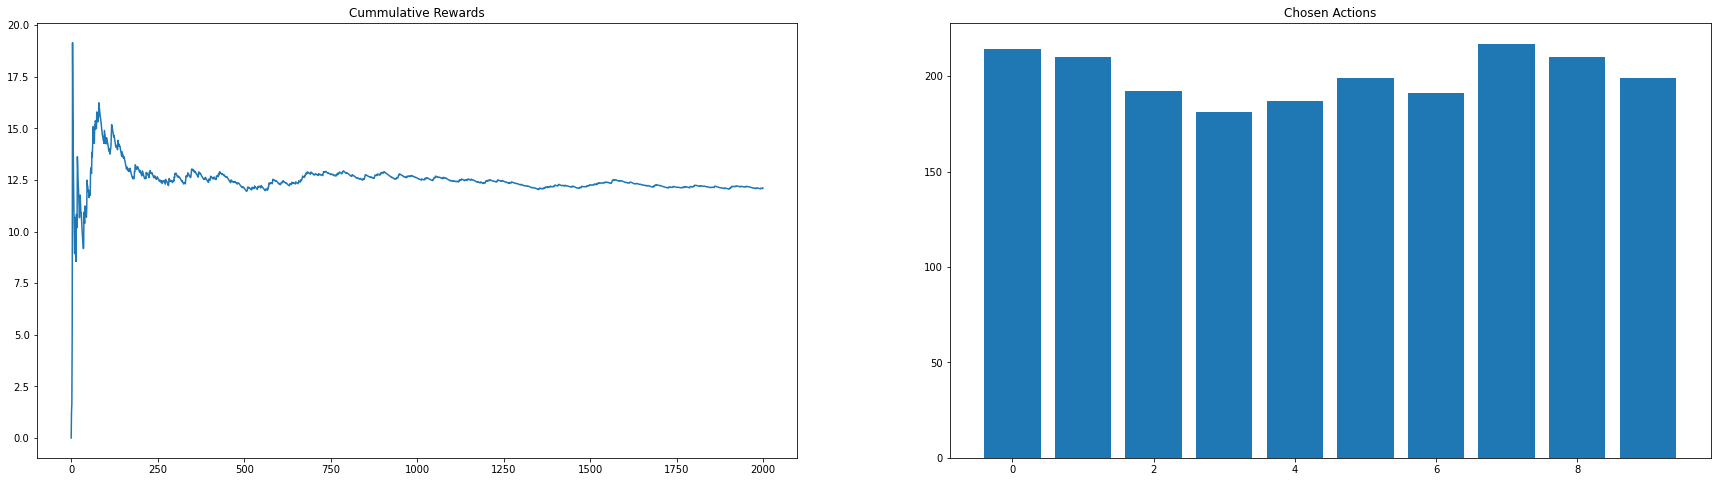

In [25]:
plot_history(ra_history) #random bandits

### Plot 2: Epsilon Greedy  

In [33]:
egreedy_agent = EpsilonGreedyAgent(environment, max_iterations=2000, epsilon=0.1)
eg_history = egreedy_agent.act()
print(f"TOTAL REWARD : {sum(eg_history['rewards'])}")

TOTAL REWARD : 101892.6


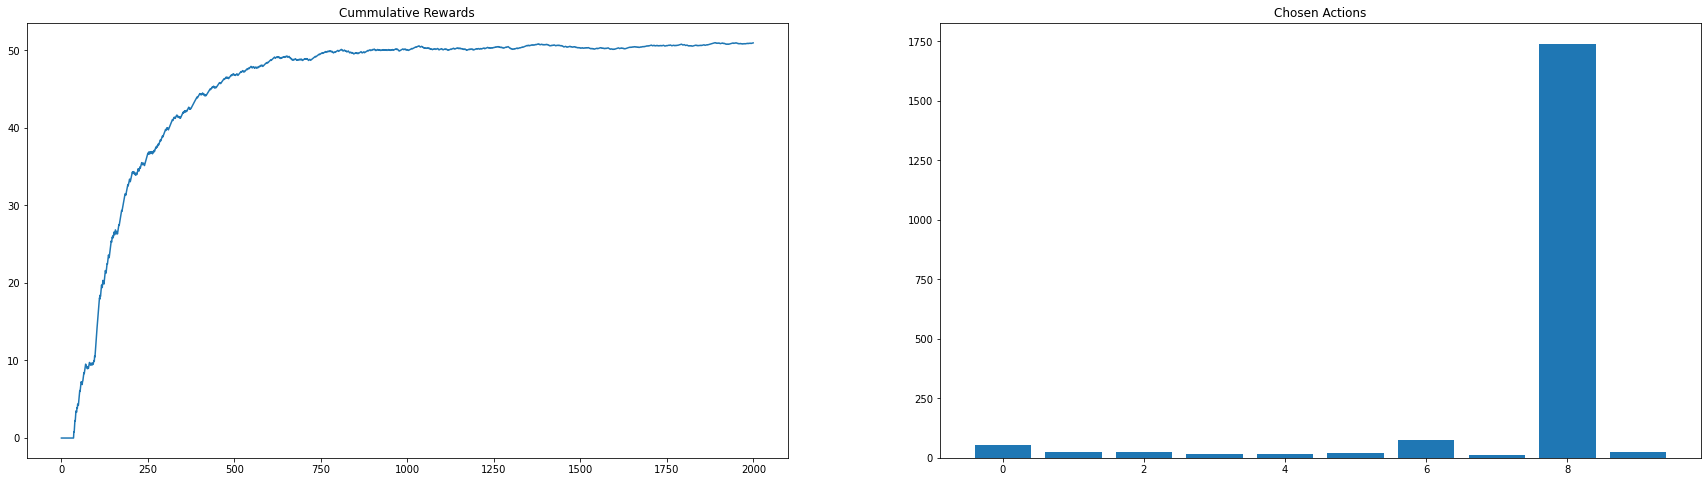

In [34]:
plot_history(eg_history) #epsilon greedy

### Plot 3: Epsilon Greedy Decay

In [91]:
egreedy_decay_agent = EpsilonGreedyDecayAgent(environment, max_iterations=2000, epsilon=0.1, decay=0.1)
egd_history = egreedy_decay_agent.act()
print(f"TOTAL REWARD : {sum(egd_history['rewards'])}")

TOTAL REWARD : 112817.1


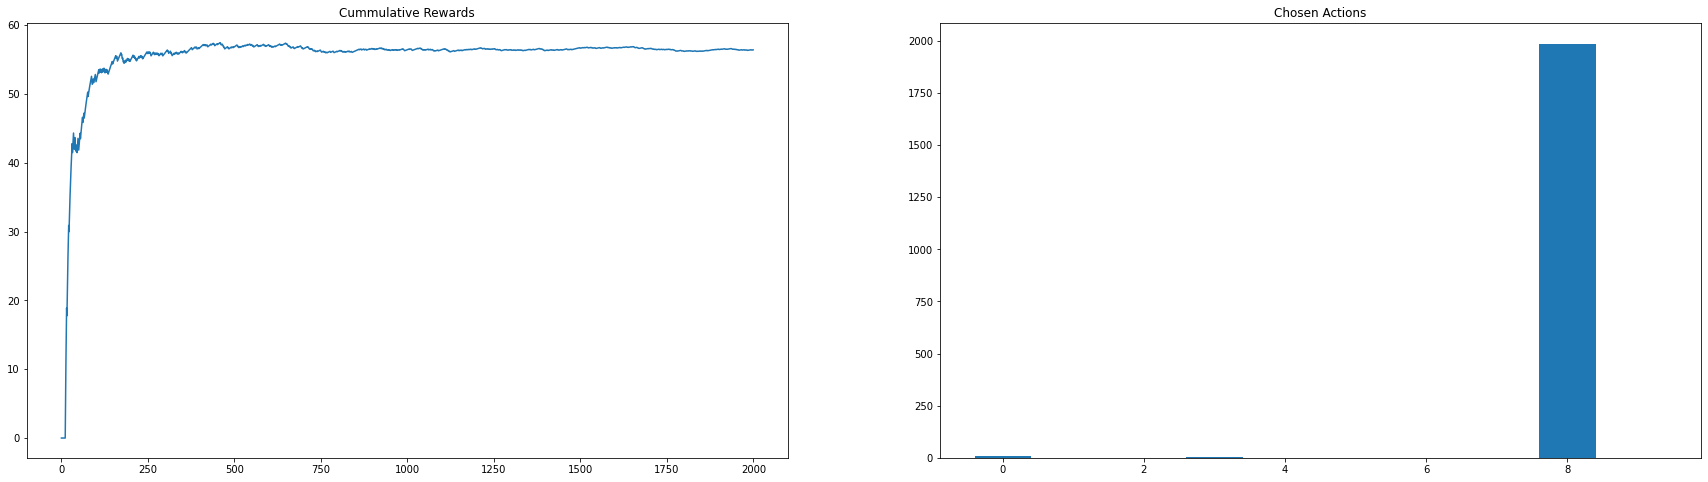

In [92]:
plot_history(egd_history) #epsilon greedy decay